In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
# Load the dataset
df = pd.read_csv('./ToyotaCorolla.csv')

# Display dataset columns
print("Dataset columns:", df.columns)

# Selecting the relevant columns
df = df[["Price", "Age_08_04", "KM", "HP", "cc", "Doors", "Gears", "Quarterly_Tax", "Weight"]]

# Display first few rows
print("First few rows of the dataset:")
print(df.head())

Dataset columns: Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Automatic', 'cc', 'Doors', 'Cylinders',
       'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee', 'BOVAG_Guarantee',
       'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco',
       'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock',
       'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps',
       'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette',
       'Tow_Bar'],
      dtype='object')
First few rows of the dataset:
   Price  Age_08_04     KM  HP    cc  Doors  Gears  Quarterly_Tax  Weight
0  13500         23  46986  90  2000      3      5            210    1165
1  13750         23  72937  90  2000      3      5            210    1165
2  13950         24  41711  90  2000      3      5            210    1165
3  14950         26  48000  90  2000      3      5            210    1165
4  13750         30  38500

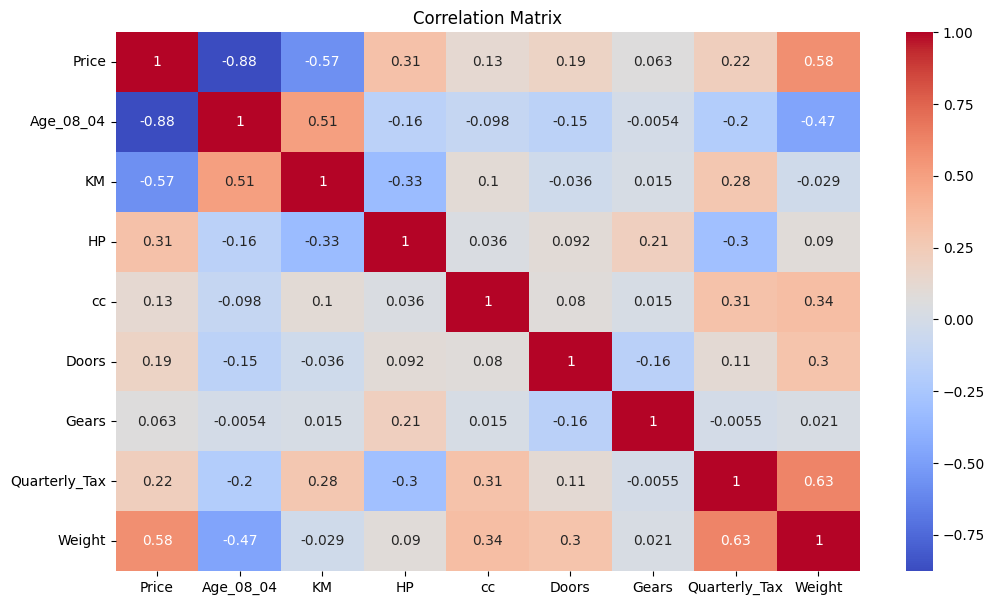

In [5]:
# Plot correlation heatmap
corr_results = df.corr()
fig = plt.figure(figsize=(12, 7))
sns.heatmap(corr_results, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

# Splitting the data into features (X) and target (y)
X = df.iloc[:, 1:].values  # Features
y = df.iloc[:, 0].values  # Target (Price)

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Shape of X_train: (1077, 8)
Shape of X_test: (359, 8)
Shape of y_train: (1077,)
Shape of y_test: (359,)


In [7]:
# Linear Regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
accuracy = 1 - mse / y_test.var()

In [8]:
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")
print(f"Accuracy: {accuracy:.2f}")

# Comparison of predicted vs actual values
comparison = np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), axis=1)
print("Comparison of predicted vs actual values:")
print(comparison)

Mean Absolute Error (MAE): 1019.39
Mean Squared Error (MSE): 1965831.34
Root Mean Squared Error (RMSE): 1402.08
R-squared (R²): 0.86
Accuracy: 0.86
Comparison of predicted vs actual values:
[[11372.36615311 10800.        ]
 [ 8955.14888862  9950.        ]
 [ 9528.21510669  7500.        ]
 [ 8989.39260139  9250.        ]
 [10028.06634815  9750.        ]
 [ 7801.23894664  9950.        ]
 [ 8811.52659355  9895.        ]
 [ 8332.43952766  6750.        ]
 [14173.18461838 13450.        ]
 [13220.99992018 12950.        ]
 [ 9362.10537728  9900.        ]
 [ 9389.38696975  9750.        ]
 [13039.41200313 13500.        ]
 [13161.75131656 11500.        ]
 [ 9770.38483855  8950.        ]
 [ 8302.13007256  8950.        ]
 [12364.26480942 11500.        ]
 [17399.69007405 16950.        ]
 [ 7271.96926252  8250.        ]
 [ 9231.01631342  6999.        ]
 [12855.60774966 11495.        ]
 [17818.92569264 19500.        ]
 [ 7911.6025945   7950.        ]
 [10554.85098484 10750.        ]
 [ 7422.37938614  

In [9]:
def calculate_mse_r2(y_test, y_predict):
    # Convert inputs to numpy arrays
    y_test = np.array(y_test)
    y_predict = np.array(y_predict)

    mse = np.mean((y_test - y_predict) ** 2)
    ss_total = np.sum((y_test - np.mean(y_test)) ** 2)
    ss_residual = np.sum((y_test - y_predict) ** 2)
    r2 = 1 - (ss_residual / ss_total)

    return mse, r2

In [10]:
mse_manual, r2_manual = calculate_mse_r2(y_test, y_pred)
print(f"Manual Mean Squared Error: {mse_manual:.2f}")
print(f"Manual R-squared: {r2_manual:.2f}")

Manual Mean Squared Error: 1965831.34
Manual R-squared: 0.86
